<a href="https://colab.research.google.com/github/Tehyla/ML-21-days-Challenge/blob/main/21_Days_ML_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model Equation: y = 2.00x + 0.00


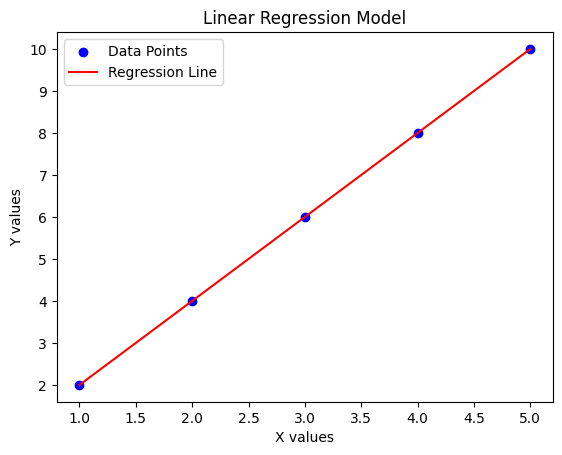

In [ ]:
#Day 1 Diving into Data
#Today, we’ll train a simple linear regression model to learn the relationship between X and y values
#Linear regression is a type of machine learning model that finds the best-fitting straight line through a set of points.

#In our case, we have:
#X values → [1, 2, 3, 4, 5]
#y values → [2, 4, 6, 8, 10]
#Clearly, there’s a pattern: y = 2x.
#Let’s see if our ML model can discover this pattern!


# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Step 1: Prepare the data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)  # Reshaping because sklearn expects 2D input
y = np.array([2, 4, 6, 8, 10])  # The corresponding output values

# Step 2: Create and train the model
model = LinearRegression()  # Initialize a linear regression model
model.fit(X, y)  # Train the model using our X and y data

# Step 3: Make predictions
y_pred = model.predict(X)  # Get the model's predictions

# Step 4: Print the model equation
print(f"Model Equation: y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}")

# Step 5: Visualize the results
plt.scatter(X, y, color='blue', label='Data Points')  # Original data points
plt.plot(X, y_pred, color='red', label='Regression Line')  # The model's prediction
plt.xlabel("X values")
plt.ylabel("Y values")
plt.title("Linear Regression Model")
plt.legend()
plt.show()


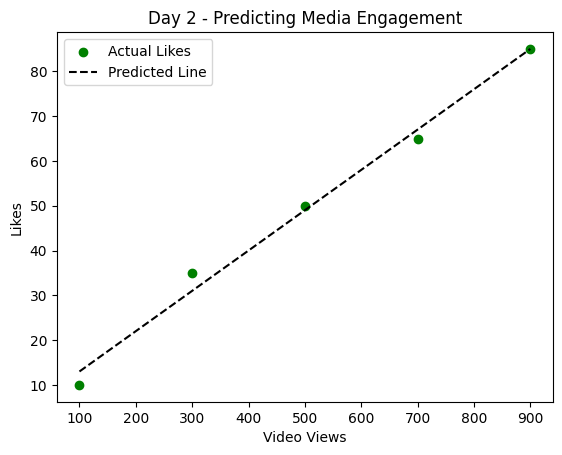

Model Equation: likes = 0.09 * views + 4.00


In [ ]:
#Day 2 Media and Machine Learning
#Linear Regression part 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Simulated media data
views = np.array([100, 300, 500, 700, 900]).reshape(-1, 1)
likes = np.array([10, 35, 50, 65, 85])  # Likes increase with views

# Train model
model = LinearRegression()
model.fit(views, likes)
likes_pred = model.predict(views)

# Visualize
plt.scatter(views, likes, color='green', label='Actual Likes')
plt.plot(views, likes_pred, color='black', linestyle='--', label='Predicted Line')
plt.xlabel("Video Views")
plt.ylabel("Likes")
plt.title("Day 2 - Predicting Media Engagement")
plt.legend()
plt.show()

# Print learned pattern
print(f"Model Equation: likes = {model.coef_[0]:.2f} * views + {model.intercept_:.2f}")


In [ ]:
#Day 3
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

# Simulated media comment dataset
data = {
    'comments': [
        "I love this video!",
        "So boring and long.",
        "Amazing content!",
        "Not helpful at all.",
        "Super inspiring, thank you!",
        "Waste of time."
    ],
    'sentiment': ['positive', 'negative', 'positive', 'negative', 'positive', 'negative']
}

df = pd.DataFrame(data)

# Split data
X = df['comments']
y = df['sentiment']

# Create and train pipeline
model = make_pipeline(CountVectorizer(), MultinomialNB())
model.fit(X, y)

# Try a new comment
test = ["This was absolutely amazing!"]
prediction = model.predict(test)

print(f"Prediction: {prediction[0]}")


Prediction: positive


In [ ]:
#Day 4
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

# Sample headlines dataset
data = {
    'headline': [
        "You won't believe what happened next!",
        "New study reveals coffee benefits",
        "This one trick will change your life",
        "Experts discuss global climate policy",
        "Shocking secret behind the new iPhone",
        "Local hero saves family from fire"
    ],
    'label': ['clickbait', 'not_clickbait', 'clickbait', 'not_clickbait', 'clickbait', 'not_clickbait']
}

df = pd.DataFrame(data)

X = df['headline']
y = df['label']

# Build and train model
model = make_pipeline(TfidfVectorizer(), LogisticRegression())
model.fit(X, y)

# Test it
test = ["Doctors hate her for this simple trick"]
prediction = model.predict(test)
print(f"Prediction: {prediction[0]}")


Prediction: clickbait


In [ ]:
#Day 5
# Import necessary libraries
import librosa
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Step 1: Upload your audio files manually in Colab
# Run this cell to upload files like calm1.wav, calm2.wav, loud1.wav, loud2.wav
from google.colab import files
uploaded = files.upload()

# Step 2: Feature extraction function
# This function "listens" to the audio file and extracts numerical features
def extract_features(file_path):
    audio, sr = librosa.load(file_path, duration=3)  # Load 3 seconds of audio
    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)  # Extract MFCCs
    return np.mean(mfcc.T, axis=0)  # Average across time axis to flatten the array

# Step 3: Prepare training data
# Add the names of your uploaded calm and chaotic audio files here
calm_files = ['calm1.wav', 'calm2.wav']
chaotic_files = ['loud1.wav', 'loud2.wav']

X = []  # Features
y = []  # Labels

# Process calm files and label them
for f in calm_files:
    features = extract_features(f)
    X.append(features)
    y.append('calm')

# Process chaotic files and label them
for f in chaotic_files:
    features = extract_features(f)
    X.append(features)
    y.append('chaotic')

# Step 4: Train a machine learning model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Step 5: Test the model with a new sample
# Replace 'calm1.wav' with a new uploaded file you want to classify
test_features = extract_features('calm1.wav')
prediction = model.predict([test_features])
print(f"🗣️ The model thinks this clip sounds: {prediction[0].upper()}")


Saving loud2.wav to loud2 (2).wav
Saving loud1.wav to loud1 (2).wav
Saving calm2.wav to calm2 (2).wav
Saving calm1.wav to calm1 (2).wav
🗣️ The model thinks this clip sounds: CALM


In [ ]:
#Day 6
#ML video recommendation
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Step 1: Create a small dataset of movies and their descriptions
data = {
    'title': [
        'The Social Network',
        'Steve Jobs',
        'Interstellar',
        'Inception',
        'The Imitation Game'
    ],
    'description': [
        'A young entrepreneur creates a social media empire while navigating legal battles.',
        'The story of Apple co-founder Steve Jobs and his rise in tech innovation.',
        'Explorers travel through space and time to save humanity.',
        'A thief enters dreams to steal secrets using shared dream technology.',
        'A mathematician cracks Nazi codes during World War II.'
    ]
}

df = pd.DataFrame(data)

# Step 2: Convert descriptions into numerical vectors using TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['description'])

# Step 3: Compute cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Step 4: Recommend similar movies based on input title
def recommend_movie(title, df, similarity_matrix):
    index = df[df['title'] == title].index[0]
    similar_scores = list(enumerate(similarity_matrix[index]))
    similar_scores = sorted(similar_scores, key=lambda x: x[1], reverse=True)[1:]

    top_matches = [df['title'][i[0]] for i in similar_scores[:3]]
    return top_matches

# Example: Recommend movies similar to 'The Imitation Game'
recommendations = recommend_movie('The Imitation Game', df, cosine_sim)
print("🎬 If you liked 'The Imitation Game', you might also enjoy:")
for movie in recommendations:
    print(f"- {movie}")


🎬 If you liked 'The Imitation Game', you might also enjoy:
- The Social Network
- Steve Jobs
- Interstellar


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 29s 14ms/step - accuracy: 0.7762 - loss: 0.6519 - val_accuracy: 0.8608 - val_loss: 0.4052
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 24s 4ms/step - accuracy: 0.8564 - loss: 0.3988 - val_accuracy: 0.8577 - val_loss: 0.3959
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8753 - loss: 0.3463 - val_accuracy: 0.8765 - val_loss: 0.3458
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8863 - loss: 0.3142 - val_accuracy: 0.8773 - val_loss: 0.3475
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8907 - loss: 0.2994 - val_accuracy: 0.8738 - val_loss: 0.3519
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8627 - loss: 0.3706

🎉 Test accuracy: 0.86
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


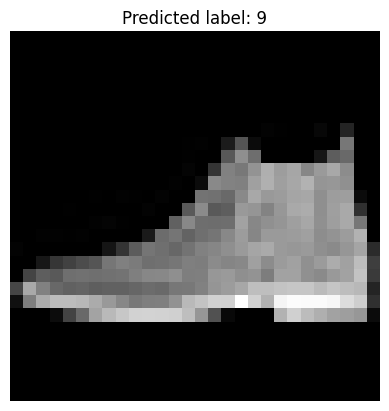

In [ ]:
#Day 7
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
import matplotlib.pyplot as plt

# 🖼️ Load dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# 🧠 Normalize the pixel values
X_train, X_test = X_train / 255.0, X_test / 255.0

# 🧩 Build a simple neural network
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # 10 classes
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 🚀 Train the model
model.fit(X_train, y_train, epochs=5, validation_split=0.1)

# 🎯 Evaluate
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\n🎉 Test accuracy: {test_acc:.2f}")

# 🔍 Visualize one prediction
plt.imshow(X_test[0], cmap='gray')
plt.title(f"Predicted label: {model.predict(X_test[:1]).argmax()}")
plt.axis('off')
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


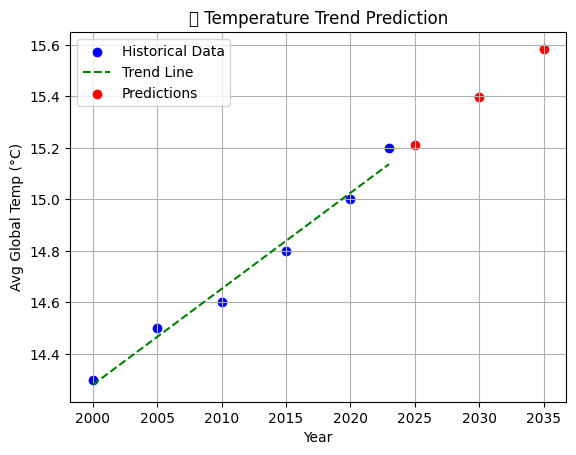

In [ ]:
#Day 8
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

#Simulated climate data: years and average global temperatures
data = {
    'year': np.array([2000, 2005, 2010, 2015, 2020, 2023]),
    'temperature': np.array([14.3, 14.5, 14.6, 14.8, 15.0, 15.2])  # In °C
}

df = pd.DataFrame(data)

# Train a simple linear regression model
X = df[['year']]
y = df['temperature']

model = LinearRegression()
model.fit(X, y)

# Predict temperatures for future years
future_years = pd.DataFrame({'year': [2025, 2030, 2035]})
future_temps = model.predict(future_years)

# Plot results
plt.scatter(X, y, color='blue', label='Historical Data')
plt.plot(X, model.predict(X), color='green', linestyle='--', label='Trend Line')
plt.scatter(future_years, future_temps, color='red', label='Predictions')
plt.xlabel('Year')
plt.ylabel('Avg Global Temp (°C)')
plt.title('🌡️ Temperature Trend Prediction')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#day 9
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

#  Simulated dataset: Monthly rainfall (mm) for a few years
data = {
    'year': np.array([2015, 2016, 2017, 2018, 2019, 2020]),
    'rainfall_mm': np.array([850, 890, 920, 870, 950, 980])  # Total annual rainfall
}

df = pd.DataFrame(data)

# Build the regression model
X = df[['year']]
y = df['rainfall_mm']

model = LinearRegression()
model.fit(X, y)

# 🔮 Predict rainfall for upcoming years
future_years = pd.DataFrame({'year': [2021, 2022, 2023, 2024]})
predicted_rainfall = model.predict(future_years)

#  Visualize
plt.scatter(X, y, color='blue', label='Actual Rainfall')
plt.plot(X, model.predict(X), color='green', linestyle='--', label='Trend Line')
plt.scatter(future_years, predicted_rainfall, color='red', label='Predicted')
plt.xlabel('Year')
plt.ylabel('Total Rainfall (mm)')
plt.title('🌧️ Rainfall Prediction')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#day 10
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

#  Simulated soil data: pH, nitrogen, phosphorus, potassium
data = {
    'pH': [5.5, 6.0, 7.2, 4.9, 6.5, 7.0, 5.8, 6.8],
    'nitrogen': [35, 40, 70, 25, 65, 80, 30, 75],
    'phosphorus': [15, 20, 35, 10, 30, 40, 12, 38],
    'potassium': [100, 110, 140, 90, 130, 150, 95, 145],
    'fertile': [0, 0, 1, 0, 1, 1, 0, 1]  # 1 = fertile, 0 = not fertile
}

df = pd.DataFrame(data)

#  Step 1: Split features and target
X = df[['pH', 'nitrogen', 'phosphorus', 'potassium']]
y = df['fertile']

#  Step 2: Train the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
model = LogisticRegression()
model.fit(X_train, y_train)

#  Step 3: Evaluate
predictions = model.predict(X_test)
print("Soil Fertility Classification Report:")
print(classification_report(y_test, predictions))


In [1]:
#Day 11 Drought Risk Classifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

#  Step 1: Simulated climate dataset
# Features: avg rainfall (mm) + avg temp (°C)
# Target: 1 = Drought likely, 0 = No drought
data = {
    'rainfall_mm': [100, 85, 60, 40, 120, 95, 30, 25, 130, 70],
    'temperature_C': [24, 26, 29, 32, 23, 25, 33, 34, 22, 28],
    'drought_risk': [0, 0, 1, 1, 0, 0, 1, 1, 0, 1]
}

df = pd.DataFrame(data)

# Step 2: Split data into features & labels
X = df[['rainfall_mm', 'temperature_C']]
y = df['drought_risk']

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Train the Decision Tree Classifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Step 5: Evaluate
y_pred = model.predict(X_test)
print(" Drought Risk Prediction Report:")
print(classification_report(y_test, y_pred))

# Bonus: Predict risk for new data
new_data = pd.DataFrame({
    'rainfall_mm': [50, 110],
    'temperature_C': [31, 24]
})
predictions = model.predict(new_data)

for i, risk in enumerate(predictions):
    status = " High Drought Risk" if risk == 1 else "🌧️ Low Risk"
    print(f"Region {i+1}: {status}")


 Drought Risk Prediction Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

Region 1:  High Drought Risk
Region 2: 🌧️ Low Risk
